<a href="https://colab.research.google.com/github/Looking-forward-to-Ctrlc-Ctrlv/Investigating-Strategies-for-Diabetic-Retina-Fundus-Image-Synthesis-using-GANs/blob/main/GANSHDQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage import io, transform
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.layers import Conv2D, UpSampling2D

# # Define paths to your dataset
# image_folder = '/content/drive/MyDrive/HD Fundus'

# # Initialize a list to store images
# images = []

# # Set the maximum number of images to load
# max_images = 2

# # Load images from the specified folder
# for image_file in os.listdir(image_folder):
#     if image_file.endswith('.jpg') and len(images) < max_images:
#         image_path = os.path.join(image_folder, image_file)
#         image = io.imread(image_path)
#         images.append(transform.resize(image, (256, 256)))  # Resize and normalize

# # Define a VGG16-based feature extractor
# def build_feature_extractor():
#     base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
#     for layer in base_model.layers:
#         layer.trainable = False  # Freeze VGG16 layers

#     model = Sequential()
#     model.add(base_model)
#     model.add(Flatten())
#     model.add(Dense(256))  # You can adjust the number of output features as needed
#     return model

# feature_extractor = build_feature_extractor()  # Define the feature extractor
# # Define the generator with default filters
# def build_generator():
#     model = Sequential()
#     model.add(Dense(256, input_dim=100))
#     model.add(LeakyReLU(0.2))
#     model.add(BatchNormalization(momentum=0.8))
#     model.add(Dense(512))
#     model.add(LeakyReLU(0.2))
#     model.add(BatchNormalization(momentum=0.8))
#     model.add(Dense(1024))
#     model.add(LeakyReLU(0.2))
#     model.add(BatchNormalization(momentum=0.8))

#     # Output layer with default filters
#     model.add(Dense(256 * 256 * 3, activation='tanh'))
#     model.add(Reshape((256, 256, 3)))
#     return model

# # Define the discriminator with default filters
# def build_discriminator():
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(256, 256, 3), padding='same'))
#     model.add(LeakyReLU(0.2))
#     model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
#     model.add(LeakyReLU(0.2))
#     model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
#     model.add(LeakyReLU(0.2))
#     model.add(Flatten())

#     # Output layer
#     model.add(Dense(1, activation='sigmoid'))
#     return model

# # Compile the discriminator and generator
# discriminator = build_discriminator()
# discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# generator = build_generator()
# z = Input(shape=(100,))
# img = generator(z)

# discriminator.trainable = False  # Freeze the discriminator during GAN training

# validity = discriminator(img)

# combined = Model(z, validity)
# combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# # Training parameters
# epochs = 30000
# batch_size = 2
# save_interval = 1000

# # Adversarial ground truths
# valid = np.ones((batch_size, 1))
# fake = np.zeros((batch_size, 1))

# # Training the GAN
# def train_gan(epochs, batch_size):
#     num_samples = len(images)
#     num_batches = num_samples // batch_size

#     for epoch in range(epochs):
#         np.random.shuffle(images)
#         d_loss = 0  # Initialize d_loss

#         for batch_idx in range(num_batches):
#             start_idx = batch_idx * batch_size
#             end_idx = (batch_idx + 1) * batch_size
#             batch_images = np.array(images[start_idx:end_idx])

#             noise = np.random.normal(0, 1, (batch_size, 100))

#             gen_imgs = generator.predict(noise)

#             d_loss_real = discriminator.train_on_batch(batch_images, np.ones((batch_size, 1)))  # Use real images
#             d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))  # Use generated images
#             d_loss += 0.5 * np.add(d_loss_real, d_loss_fake)

#             noise = np.random.normal(0, 1, (batch_size, 100))
#             g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

#         d_loss = d_loss / num_batches  # Calculate the average d_loss

#         print(f"Epoch {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")

#         if epoch % save_interval == 0:
#             save_generated_images(epoch)

# # Save generated images
# def save_generated_images(epoch, examples=10):
#     noise = np.random.normal(0, 1, (examples, 100))
#     gen_imgs = generator.predict(noise)
#     gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

#     fig, axs = plt.subplots(1, examples, figsize=(20, 20))
#     cnt = 0
#     for i in range(examples):
#         axs[i].imshow(gen_imgs[cnt])
#         axs[i].axis('off')
#         cnt += 1
#     plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
#     plt.close()

# # Train the GAN
# train_gan(epochs=epochs, batch_size=batch_size)



In [ ]:
import tensorflow as tf

# Clear the GPU memory
tf.keras.backend.clear_session()

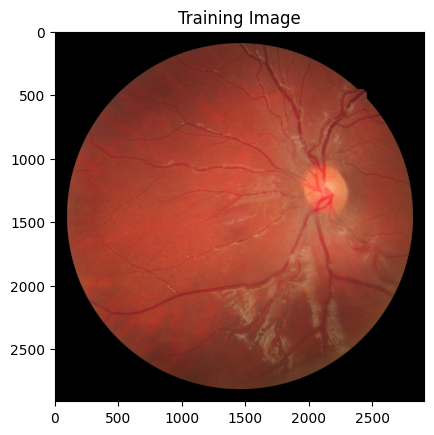

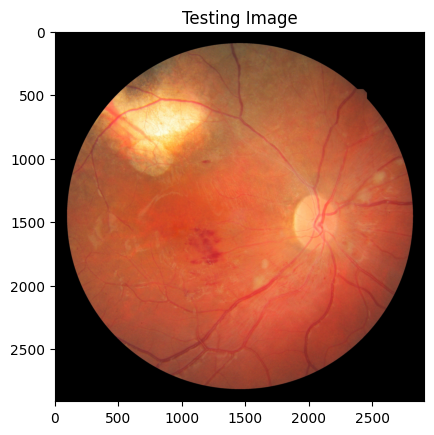

1/1 [==============================] - 0s 148ms/step
Epoch 0, Avg D Loss Real: 0.6023417711257935, Avg D Loss Fake: 0.7102131843566895, Avg G Loss: 0.6913980841636658
1/1 [==============================] - 0s 16ms/step
Epoch 1, Avg D Loss Real: 1.5697387373237934e-14, Avg D Loss Fake: 0.3291206657886505, Avg G Loss: 0.6756787896156311
1/1 [==============================] - 0s 17ms/step
Epoch 2, Avg D Loss Real: 7.050057052067005e-18, Avg D Loss Fake: 0.013526671566069126, Avg G Loss: 0.6544491648674011
1/1 [==============================] - 0s 18ms/step
Epoch 3, Avg D Loss Real: 6.462191888242026e-19, Avg D Loss Fake: 3.430317883612588e-05, Avg G Loss: 0.6291924715042114
1/1 [==============================] - 0s 16ms/step
Epoch 4, Avg D Loss Real: 3.158034699529384e-19, Avg D Loss Fake: 1.307864295085892e-06, Avg G Loss: 0.5988441109657288
1/1 [==============================] - 0s 20ms/step
Epoch 5, Avg D Loss Real: 2.580011485728927e-19, Avg D Loss Fake: 1.8878662522148204e-10, Avg G 

KeyboardInterrupt: ignored

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

# Define paths to image folders
train_image_folder = '/content/drive/MyDrive/HD Fundus'
test_image_folder = '/content/drive/MyDrive/HD Fundus Test'

# Initialize lists to store images
train_images = []
test_images = []

# Set the maximum number of images to load (e.g., 2)
max_images = 1

# Load training images and display them
for image_file in os.listdir(train_image_folder):
    if image_file.endswith('.jpg') and len(train_images) < max_images:
        image_path = os.path.join(train_image_folder, image_file)
        image = io.imread(image_path)
        train_images.append(transform.resize(image, (128, 128)))  # Resize to 128x128

        # Display the training image
        plt.imshow(image)
        plt.title("Training Image")
        plt.show()

# Load testing images and display them
for image_file in os.listdir(test_image_folder):
    if image_file.endswith('.jpg') and len(test_images) < max_images:
        image_path = os.path.join(test_image_folder, image_file)
        image = io.imread(image_path)
        test_images.append(transform.resize(image, (128, 128)))  # Resize to 128x128

        # Display the testing image
        plt.imshow(image)
        plt.title("Testing Image")
        plt.show()

# Define a VGG16-based feature extractor with modified input shape
def build_feature_extractor(input_shape):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False  # Freeze VGG16 layers

    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256))  # You can adjust the number of output features as needed
    return model

feature_extractor = build_feature_extractor(input_shape=(128, 128, 3))  # Define the feature extractor

# Define the generator
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(128 * 128 * 3, activation='tanh'))
    model.add(Reshape((128, 128, 3)))
    return model

# Define the discriminator
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(128, 128, 3)))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Compile the discriminator and generator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

generator = build_generator()
z = Input(shape=(100,))
img = generator(z)

discriminator.trainable = False  # Freeze the discriminator during GAN training

validity = discriminator(img)

combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training parameters
epochs = 30000
batch_size = 1
save_interval = 1000

# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

# Training the GAN
def train_gan(epochs, batch_size):
    num_samples = len(train_images)
    num_batches = num_samples // batch_size

    for epoch in range(epochs):
        np.random.shuffle(train_images)

        d_loss_real_total = 0.0
        d_loss_fake_total = 0.0
        g_loss_total = 0.0
        for batch_idx in range(num_batches):
          start_idx = batch_idx * batch_size
          end_idx = (batch_idx + 1) * batch_size
          batch_images = np.array(train_images[start_idx:end_idx])
          noise = np.random.normal(0, 1, (batch_size, 100))
          gen_imgs = generator.predict(noise)
          d_loss_real = discriminator.train_on_batch(batch_images, np.ones((batch_size, 1)))[0]  # Use real images
          d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))[0]  # Use generated images
          d_loss_real_total += d_loss_real
          d_loss_fake_total += d_loss_fake
          noise = np.random.normal(0, 1, (batch_size, 100))
          g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))
          g_loss_total += g_loss


        avg_d_loss_real = d_loss_real_total / num_batches
        avg_d_loss_fake = d_loss_fake_total / num_batches
        avg_g_loss = g_loss_total / num_batches

        print(f"Epoch {epoch}, Avg D Loss Real: {avg_d_loss_real}, Avg D Loss Fake: {avg_d_loss_fake}, Avg G Loss: {avg_g_loss}")

        if epoch % save_interval == 0:
            save_generated_images(epoch)


# Save generated images
def save_generated_images(epoch, examples=10):
    noise = np.random.normal(0, 1, (examples, 100))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

    fig, axs = plt.subplots(1, examples, figsize=(20, 20))
    cnt = 0
    for i in range(examples):
        axs[i].imshow(gen_imgs[cnt])
        axs[i].axis('off')
        cnt += 1
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.close()

# Train the GAN
train_gan(epochs=epochs, batch_size=batch_size)

